In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pickle
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

### Black-Scholes pricing formula for European option

In [2]:
# Black Scholes
def BS_european_price(S0, K, T, r, sigma):
    d1 = (1/sigma*np.sqrt(T)) * (np.log(S0/K) + (r + (sigma**2)/2) * T)
    d2 = d1 - sigma * np.sqrt(T)
    c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * np.exp(-r*(T)) # call option
    p = norm.cdf(-d2) * K * np.exp(-r*(T)) - norm.cdf(-d1) * S0 # put option
    return c, p

### Monte Carlo pricing procedure for European option 

In [3]:
# Monte Carlo European
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths
    
    np.random.seed(1622) # consistent random number
    
    # calculating paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu-(1/2)*sigma**2) * dT\
                                        + sigma * np.sqrt(dT) * np.random.normal(0,1))
    c_payoff = np.zeros((numPaths, 1))
    p_payoff = np.zeros((numPaths, 1))
    
    for iPath in range(numPaths): # calculating payoff at the end of each path
        c_payoff[iPath] = np.maximum(paths[numSteps,iPath] - K,0) * np.exp(-r * T)
        p_payoff[iPath] = np.maximum(K - paths[numSteps,iPath],0) * np.exp(-r * T)
    
    c = np.mean(c_payoff) # Price of call option
    p = np.mean(p_payoff) # Price of put option
    
    return c, p, paths

###  Monte Carlo pricing procedure for Barrier knock-in option

In [13]:
# Monte Carlo Barrier
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths
    
    np.random.seed(1628) # consistent random number
    
    # calculating paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu-(1/2)*sigma**2) * dT\
                                        + sigma * np.sqrt(dT) * np.random.normal(0,1))
            
    c_payoff = np.zeros((numPaths, 1))
    p_payoff = np.zeros((numPaths, 1))
    
    for iPath in range(numPaths):
        # up-and-in
        # if one of the step along the path is greater than or equal to Barrier
        if (Sb > S0) and (np.sum(paths[:,iPath] >= Sb) > 0): 
            c_payoff[iPath] = np.maximum(paths[numSteps,iPath] - K,0) * np.exp(-r * T) 
            p_payoff[iPath] = np.maximum(K - paths[numSteps,iPath],0) * np.exp(-r * T)
            
        # down-and-in
        # if one of the step along the path less than or equal to Barrier
        elif (Sb < S0) and (np.sum(paths[:,iPath] <= Sb) > 0):
            c_payoff[iPath] = np.maximum(paths[numSteps,iPath] - K,0) * np.exp(-r * T)
            p_payoff[iPath] = np.maximum(K - paths[numSteps,iPath],0) * np.exp(-r * T)
        
        # else it is worthless 
        else:
            c_payoff[iPath] = 0
            p_payoff[iPath] = 0
    
    c = np.mean(c_payoff) # Price of call option
    p = np.mean(p_payoff) # Price of put option
    return c, p

In [22]:
numSteps = 12 
numPaths = 1000000

### Implementation and Result Outputs

In [23]:
# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, MC_1_step = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, MC_multi_step = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.00774037655515
One-step MC price of an European put option is 7.900467857110482
Multi-step MC price of an European call option is 8.020273573151362
Multi-step MC price of an European put option is 7.91533958163934
One-step MC price of an Barrier call option is 7.801283216472927
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.971483261646789
Multi-step MC price of an Barrier put option is 1.2627840739421246


### Monte Carlo European Pricing Plot (One-Step)

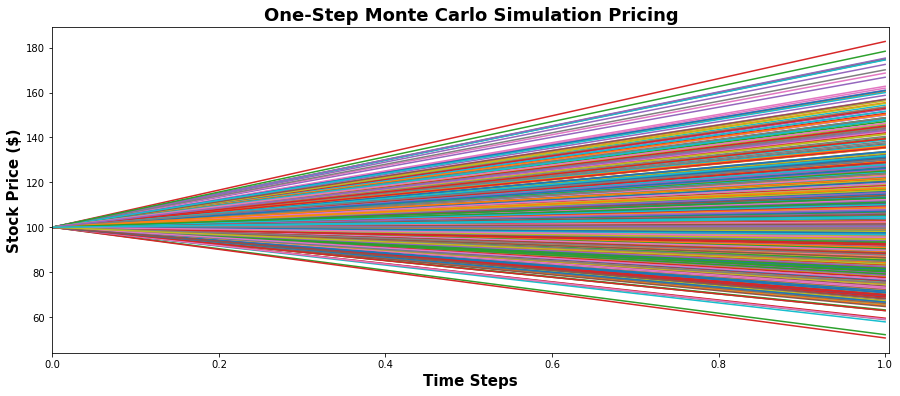

In [28]:
samplez = 1000
plt.figure(figsize=(15, 6))
plt.plot(MC_1_step[:,:samplez])
plt.title('One-Step Monte Carlo Simulation Pricing', fontsize = 18, fontweight = 'bold')
plt.ylabel('Stock Price ($)',fontsize = 15, fontweight = 'bold')
plt.xlabel('Time Steps',fontsize = 15, fontweight = 'bold')
plt.xlim(xmin=0)
plt.xlim(xmax=1+.005)
plt.show()

### Monte Carlo European Pricing Plot (Multi-Step)

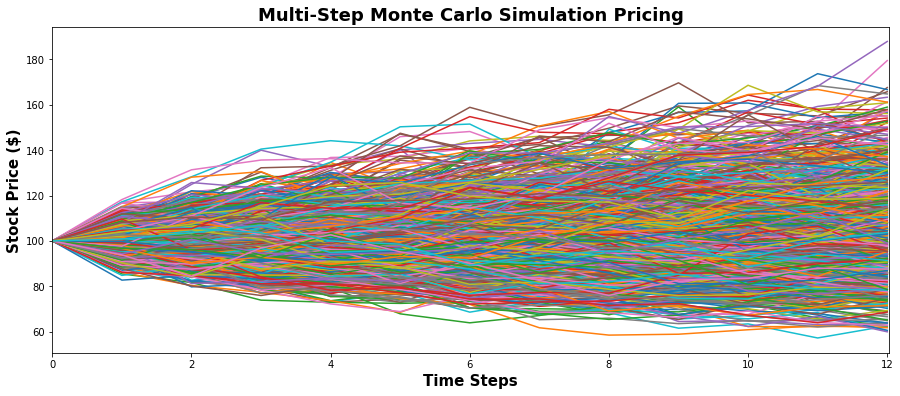

In [24]:
samplez = 1000
plt.figure(figsize=(15, 6))
plt.plot(MC_multi_step[:,:samplez])
plt.title('Multi-Step Monte Carlo Simulation Pricing', fontsize = 18, fontweight = 'bold')
plt.ylabel('Stock Price ($)',fontsize = 15, fontweight = 'bold')
plt.xlabel('Time Steps',fontsize = 15, fontweight = 'bold')
plt.xlim(xmin=0)
plt.xlim(xmax=numSteps+.03)
plt.show()

### Distribution of Simulated Prices at Maturity Plot

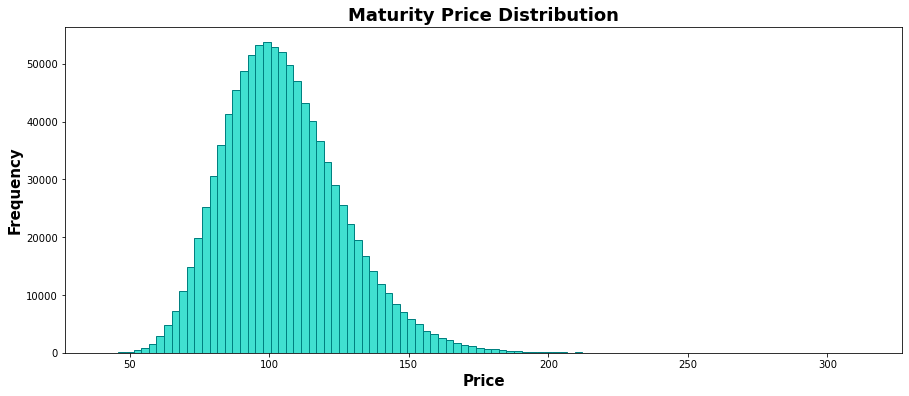

In [25]:
plt.figure(figsize=(15, 6))
plt.title('Maturity Price Distribution', fontsize = 18, fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 15, fontweight = 'bold')
plt.xlabel('Price',fontsize = 15, fontweight = 'bold')
plt.hist(MC_multi_step[-1],bins=100, color = 'Turquoise', edgecolor = 'Teal')
plt.show()

### Barrier volatility increased by 10% from the original inputs

In [96]:
# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step_inc, putMC_Barrier_Knockin_Price_1_step_inc = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step_inc, putMC_Barrier_Knockin_Price_multi_step_inc = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)

print('10% volatility increase')
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step_inc)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step_inc)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step_inc)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step_inc))

10% volatility increase
One-step MC price of an Barrier call option is 8.611894096848356
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.775833580639395
Multi-step MC price of an Barrier put option is 1.5845001343408425


### Barrier volatility decreased by 10% from the original inputs

In [97]:
# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step_dec, putMC_Barrier_Knockin_Price_1_step_dec = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*(1-0.1), 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step_dec, putMC_Barrier_Knockin_Price_multi_step_dec = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*(1-0.1), numSteps, numPaths)

print('10% volatility decrease')
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step_dec)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step_dec)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step_dec)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step_dec))

10% volatility decrease
One-step MC price of an Barrier call option is 6.985140514767021
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.162858508358032
Multi-step MC price of an Barrier put option is 0.9658229448033093


### Choosing a number of time steps and a number of scenarios in Monte Carlo pricing for European option to get the same price (up to the cent) as given by the Black-Scholes formula

In [51]:
%%time
step_list = [12,16,20,24]
path_list = [1000000]

resz_call = np.zeros((len(step_list), len(path_list)))
resz_put = np.zeros((len(step_list), len(path_list)))

for i in range(len(step_list)):
    for j in range(len(path_list)):
        callz, putz, _ = MC_european_price(S0, K, T, r, mu, sigma, step_list[i], path_list[j])
        resz_call[i,j] = callz
        resz_put[i,j] = putz


Wall time: 10min 22s


In [55]:
with open('resz_call.pickle', 'wb') as handle:
    pickle.dump(resz_call, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('resz_put.pickle', 'wb') as handle:
    pickle.dump(resz_put, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [56]:
with open('resz_call.pickle', 'rb') as handle:
    resz_call = pickle.load(handle)
    
with open('resz_put.pickle', 'rb') as handle:
    resz_put = pickle.load(handle)

In [95]:
for i in range(len(step_list)):
    if (np.abs(resz_call[i] - call_BS_European_Price)<=0.01) and\
    (np.abs(resz_put[i] - putBS_European_Price)<=0.01):
        print('Ideal steps:', step_list[i], ', Ideal number of path:', path_list[0],\
              ', error call:', np.abs(resz_call[i] - call_BS_European_Price).item(), ', error put:',\
              (np.abs(resz_put[i] - putBS_European_Price).item()))

Ideal steps: 20 , Ideal number of path: 1000000 , error call: 0.007604958712791543 , error put: 0.0032895357233462263
Ideal steps: 24 , Ideal number of path: 1000000 , error call: 0.007470880238692246 , error put: 0.004017662108971365
